### Table of contents:

* [2. Exploratory Data Analysis](#chapter2)
    * [2.1 Requirements](#section_2_1)
    * [2.2 Imports](#section_2_2)
    * [2.3 Get data](#section_2_3)
    * [2.4 Visualize data](#section_2_4)

# 2. Exploratory Data Analysis <a class="anchor" id="chapter2"></a>

## 2.1 Requirements <a class="anchor" id="section_2_1"></a>

In [ ]:
pip install matplotlib

In [16]:
pip install seaborn

     |████████████████████████████████| 292 kB 2.9 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install wordcloud

     |████████████████████████████████| 363 kB 2.7 MB/s 
Note: you may need to restart the kernel to use updated packages.


## 2.2 Imports <a class="anchor" id="section_2_2"></a>

In [1]:
import pandas as pd
import pickle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from collections import Counter

## 2.3 Get data <a class="anchor" id="section_2_3"></a>

In [2]:
data = pd.read_pickle('data_preprocessed_eda.pkl')
data.head()

,ID,label,journal,journalTitle,content,authors,publishDate,archiveDate,year,linkToArchive
0,0,não-estigmatizante,publico.pt,Público,dia janeiro jared loughner tentou matar sucess...,[],None,2012-12-30,2012,https://arquivo.pt/wayback/20121230181331/http...
1,1,não-estigmatizante,publico.pt,Público,john nash matemático nobel economia retratado ...,[],None,2016-01-17,2016,https://arquivo.pt/wayback/20160117223452/http...
2,2,estigmatizante,publico.pt,Público,cavaco sairá desta campanha pior entrou casos ...,"['Nuno Ferreira Santos', 'Arquivo']",None,2011-01-21,2011,https://arquivo.pt/wayback/20110121142608/http...
3,3,não-estigmatizante,publico.pt,Público,cientista senadora italiana rita levintalcini ...,['Clara Barata'],None,2013-01-17,2013,https://arquivo.pt/wayback/20130117170513/http...
4,4,não-estigmatizante,publico.pt,Público,ninguém sabe fazer ninguém sabe pensa come sob...,[],None,2015-04-20,2015,https://arquivo.pt/wayback/20150420143056/http...


## 2.4 Visualize data <a class="anchor" id="section_2_4"></a>

In [3]:
# (Number of news, Number of descriptors of each article)

data.shape

(645, 10)

In [4]:
# Descriptors of each article

data.columns

Index(['ID', 'label', 'journal', 'journalTitle', 'content', 'authors',
       'publishDate', 'archiveDate', 'year', 'linkToArchive'],
      dtype='object')

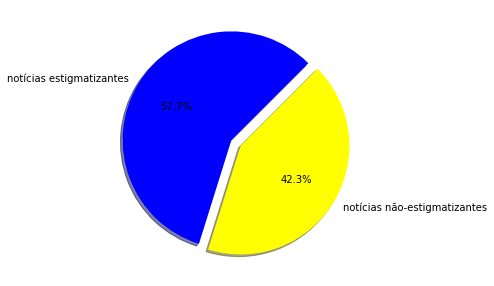

In [5]:
# Frequency of each label/category in all dataset (labelled manually)

fig1 = plt.figure(figsize = (5,5))
colors = ["blue", "yellow"]
stigma = data[data['label'] == "estigmatizante" ]
literal = data[data['label'] == "não-estigmatizante" ]
count = [stigma['label'].count(), literal['label'].count()]
pie = plt.pie(count, labels = ['notícias estigmatizantes', 'notícias não-estigmatizantes'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05))

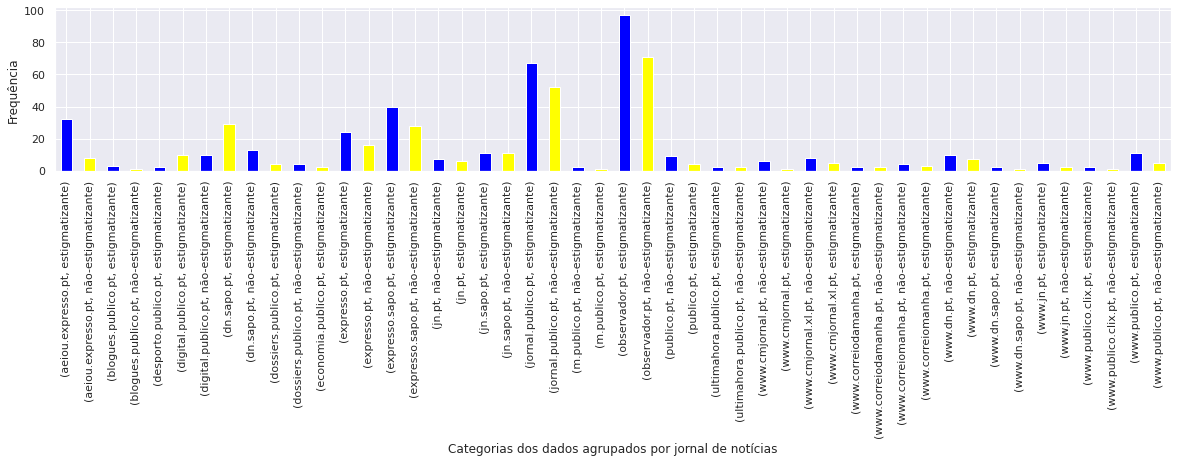

In [28]:
# Frequency of each label/category in each journal

plt.rcParams["figure.figsize"] = (20,3)
data.groupby('journal').label.value_counts().plot(kind = "bar", color = ["blue", "yellow"])
plt.xlabel("Categorias dos dados agrupados por jornal de notícias")
plt.ylabel("Frequência")
plt.show()

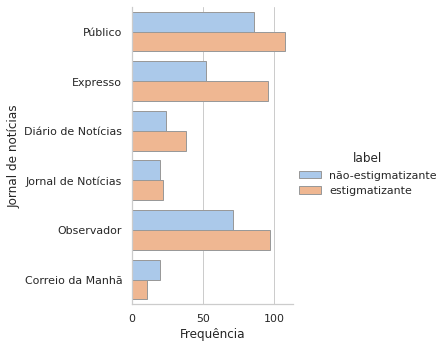

In [7]:
sns.set_theme(style="whitegrid")

fig = sns.catplot(y="journalTitle", hue="label", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)
fig.set_xlabels('Frequência', fontsize=12) 
fig.set_ylabels('Jornal de notícias', fontsize=12) 

There are 769785 words in the Público news.


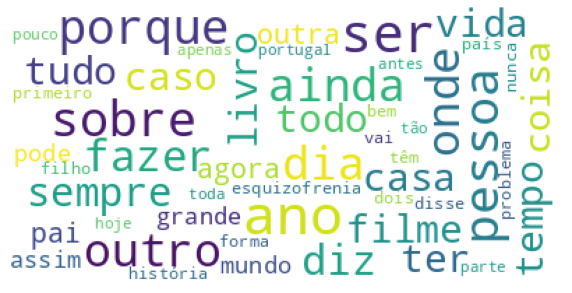

In [8]:
# Público Wordcloud

publico = data[data['journalTitle'] == "Público"]
publico_text = " ".join(content for content in publico.content)
print ("There are {} words in the Público news.".format(len(publico_text)))

publico_wordcloud = WordCloud(max_font_size=40, max_words=50, background_color="white").generate(publico_text)
plt.figure(1, figsize = (10,7))
plt.imshow(publico_wordcloud)
plt.axis("off")
plt.show()

There are 929060 words in the Expresso news.


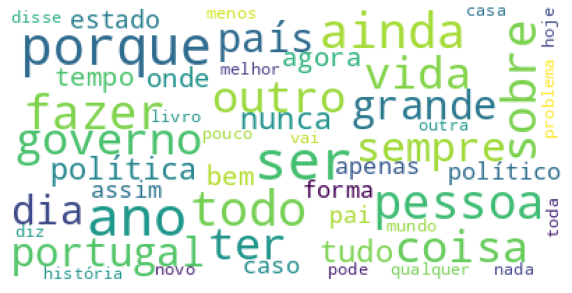

In [9]:
# Expresso Wordcloud

expresso = data[data['journalTitle'] == "Expresso"]
expresso_text = " ".join(content for content in expresso.content)
print ("There are {} words in the Expresso news.".format(len(expresso_text)))

expresso_wordcloud = WordCloud(max_font_size=40, max_words=50, background_color="white").generate(expresso_text)
plt.figure(1, figsize = (10,7))
plt.imshow(expresso_wordcloud)
plt.axis("off")
plt.show()

There are 157291 words in the Diário de Notícias news.


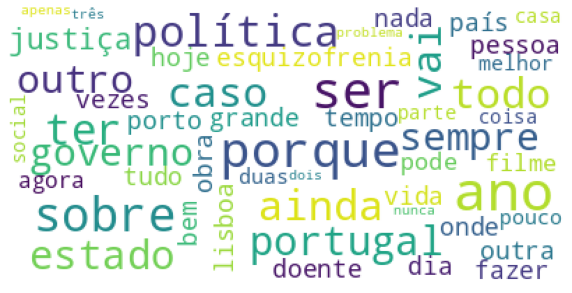

In [10]:
# Diário de Notícias Wordcloud

dn = data[data['journalTitle'] == "Diário de Notícias"]
dn_text = " ".join(content for content in dn.content)
print ("There are {} words in the Diário de Notícias news.".format(len(dn_text)))

dn_wordcloud = WordCloud(max_font_size=40, max_words=50, background_color="white").generate(dn_text)
plt.figure(1, figsize = (10,7))
plt.imshow(dn_wordcloud)
plt.axis("off")
plt.show()

There are 130461 words in the Jornal de Notícias news.


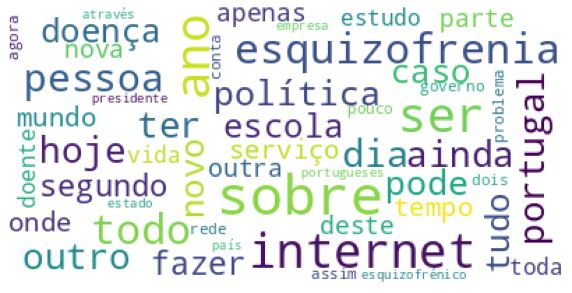

In [11]:
# Jornal de Notícias Wordcloud

jn = data[data['journalTitle'] == "Jornal de Notícias"]
jn_text = " ".join(content for content in jn.content)
print ("There are {} words in the Jornal de Notícias news.".format(len(jn_text)))

jn_wordcloud = WordCloud(max_font_size=40, max_words=50, background_color="white").generate(jn_text)
plt.figure(1, figsize = (10,7))
plt.imshow(jn_wordcloud)
plt.axis("off")
plt.show()

There are 1110760 words in the Observador news.


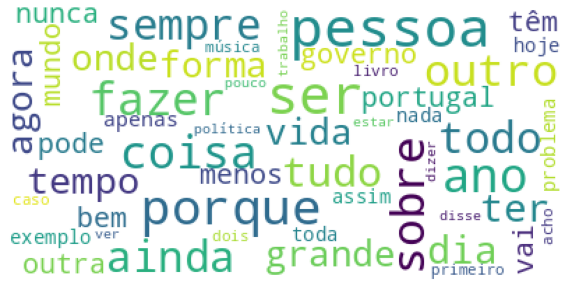

In [12]:
# Observador Wordcloud

observador = data[data['journalTitle'] == "Observador"]
observador_text = " ".join(content for content in observador.content)
print ("There are {} words in the Observador news.".format(len(observador_text)))

observador_wordcloud = WordCloud(max_font_size=40, max_words=50, background_color="white").generate(observador_text)
plt.figure(1, figsize = (10,7))
plt.imshow(observador_wordcloud)
plt.axis("off")
plt.show()

There are 86756 words in the Correio da Manhã news.


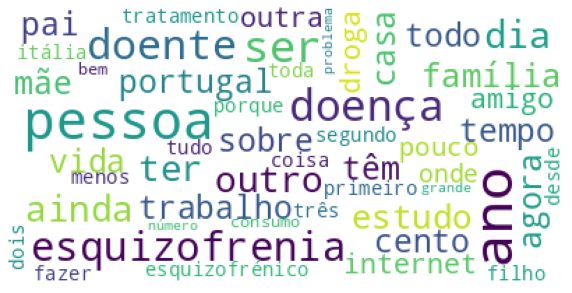

In [13]:
# Correio da Manhã Wordcloud

cm = data[data['journalTitle'] == "Correio da Manhã"]
cm_text = " ".join(content for content in cm.content)
print ("There are {} words in the Correio da Manhã news.".format(len(cm_text)))

cm_wordcloud = WordCloud(max_font_size=40, max_words=50, background_color="white").generate(cm_text)
plt.figure(1, figsize = (10,7))
plt.imshow(cm_wordcloud)
plt.axis("off")
plt.show()

Text(0, 0.5, 'Frequência')

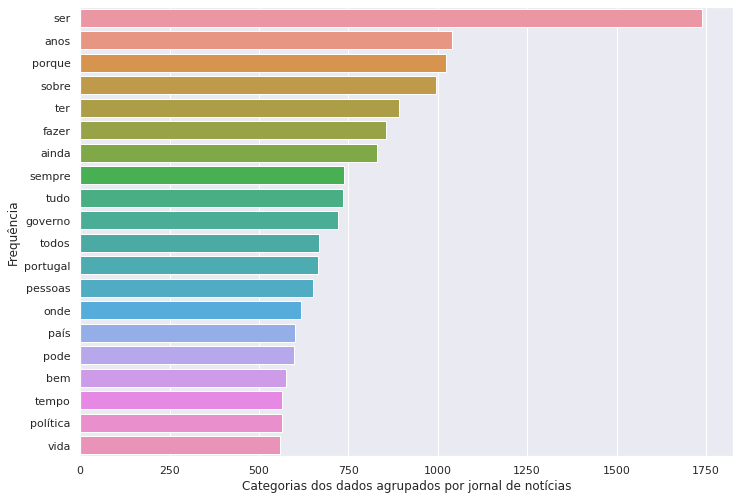

In [29]:
# Top 20 words in all stigmatizing news

stigma = data[data['label'] == "estigmatizante"]
text = stigma['content'].str.split()
text_list = text.values.tolist()
corpus=[word for i in text_list for word in i]
corpus

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    x.append(word)
    y.append(count)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=y,y=x)
plt.xlabel("Frequência")
plt.ylabel("Palavras")

Text(0, 0.5, 'Palavras')

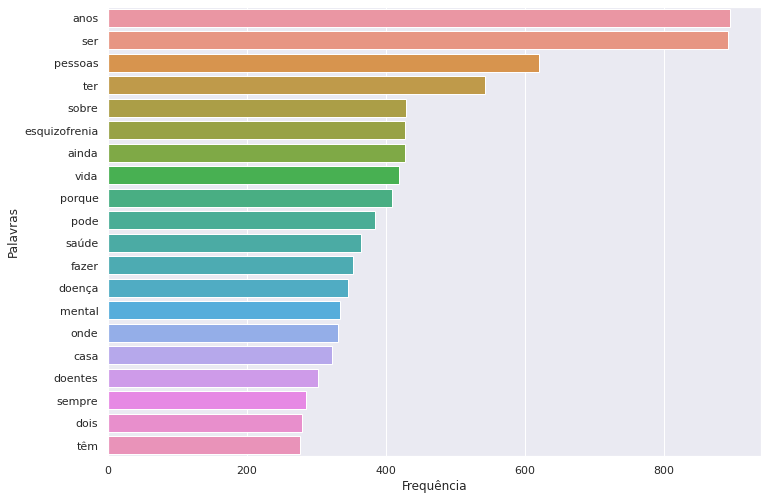

In [30]:
# Top 20 words in all non-stigmatizing news

literal = data[data['label'] == "não-estigmatizante"]
text = literal['content'].str.split()
text_list = text.values.tolist()
corpus=[word for i in text_list for word in i]
corpus

counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:20]:
    x.append(word)
    y.append(count)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=y,y=x)
plt.xlabel("Frequência")
plt.ylabel("Palavras")

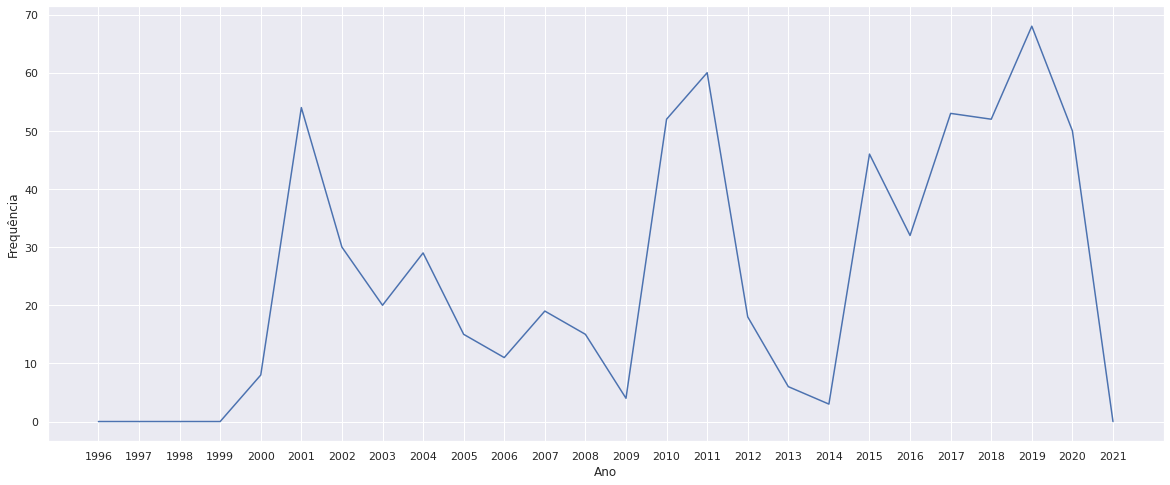

In [32]:
# Number of collected news per year

sns.set_theme(style="darkgrid")

x = ["1996","1997","1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]

y = []
for year in x:
    y.append(data.year.str.count(year).sum())

sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x, y)
plt.xlabel("Ano")
plt.ylabel("Frequência")
plt.show()

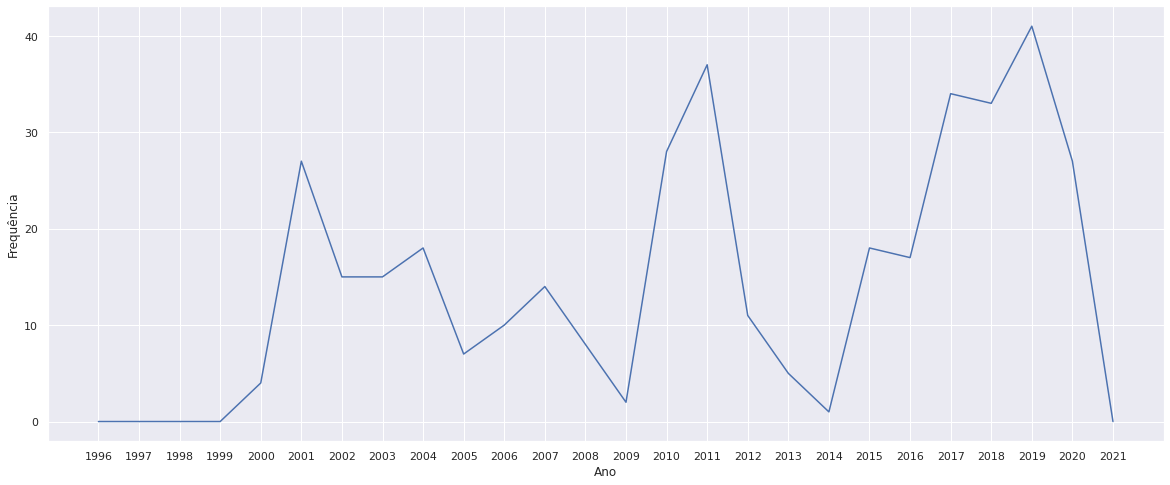

In [33]:
# Evolution of stigmatizing news per year

sns.set_theme(style="darkgrid")

x = ["1996","1997","1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]

y = []
for year in x:
    y.append(stigma.year.str.count(year).sum())

sns.set(rc={'figure.figsize':(20,8)})
sns.lineplot(x, y)
plt.xlabel("Ano")
plt.ylabel("Frequência")
plt.show()

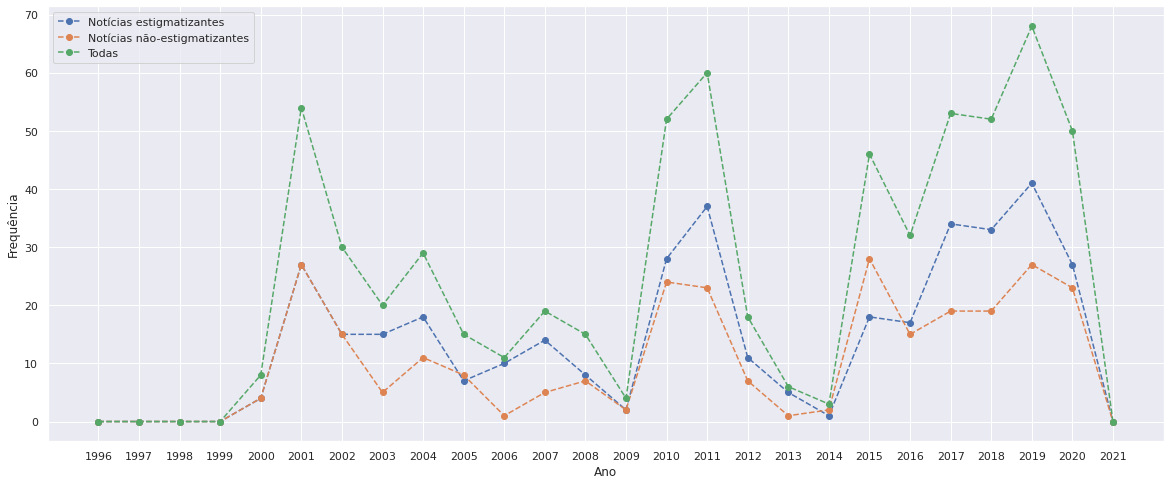

In [36]:
# Evolution of stigmatizing/non-stigmatizing/all news per year

x = ["1996","1997","1998", "1999", "2000", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]

y_stigma = []
y_non_stigma = []
y_all = []

for year in x:
    y_stigma.append(stigma.year.str.count(year).sum())
    y_non_stigma.append(literal.year.str.count(year).sum())
    y_all.append(data.year.str.count(year).sum())

plt.plot(x, y_stigma, label="Notícias estigmatizantes",marker='o', linestyle='dashed') 
plt.plot(x, y_non_stigma, label="Notícias não-estigmatizantes", marker='o', linestyle='dashed')
plt.plot(x, y_all, label="Todas", marker='o', linestyle='dashed') 
plt.xlabel("Ano")
plt.ylabel("Frequência")
plt.legend()
plt.show()